# 04_evaluation.ipynb

# Step 1: Import Libraries

In [24]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load Test Data


In [25]:
df_test = pd.read_csv("../data/test.csv")
df_test = df_test.dropna(subset=['text'])

# Step 3: Load Best Model and Vectorizer


In [26]:
model = joblib.load("../models/best_logistic_model.pkl")
vectorizer = joblib.load("../models/tfidf_vectorizer.pkl")

# Step 4: Prepare Test Data


In [27]:
X_test_tfidf = vectorizer.transform(df_test['text'])

# Step 5: Predict Test Data


In [28]:
predictions = model.predict(X_test_tfidf)

# Add predictions to DataFrame
df_test['predicted_label'] = predictions

# Step 6: Evaluate (Optional if true labels available)
# df_submit = pd.read_csv("../data/submit.csv")
# accuracy = accuracy_score(df_submit['label'], predictions)
# print(f"Test Set Accuracy: {accuracy:.2f}")
# print(classification_report(df_submit['label'], predictions))

# Step 7: Visualize Predictions


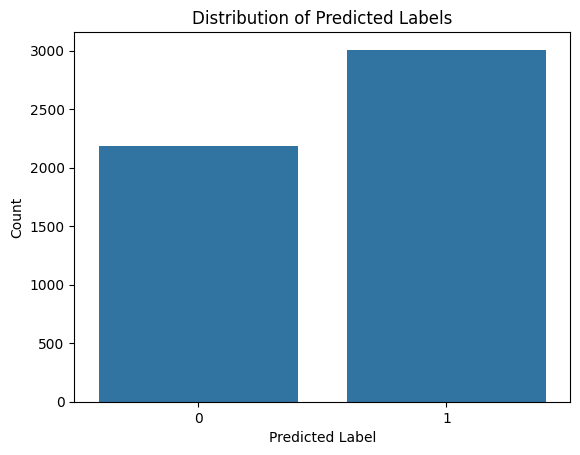

In [29]:
sns.countplot(x='predicted_label', data=df_test)
plt.title("Distribution of Predicted Labels")
plt.xlabel("Predicted Label")
plt.ylabel("Count")
plt.show()

# Step 8: Save Predictions


In [30]:
df_test[['id', 'predicted_label']].to_csv("../data/test_predictions.csv", index=False)

# Step 9: Summarize Findings


In [31]:
print("Prediction distribution:")
print(df_test['predicted_label'].value_counts())

Prediction distribution:
predicted_label
1    3007
0    2186
Name: count, dtype: int64
